In [ ]:
import cv2

In [ ]:
#Time constraint
#Overfitting
#Neural Network - Human neurons

In [ ]:
1. Open anaconda prompt as admin
2. conda install -c conda-forge tensorflow

In [9]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [1]:
import cv2

In [2]:
import os
image_name = os.listdir(r'E:\ML_Codes\natural-images\images')

In [3]:
label = []
for i in image_name:
    if i. split("_")[0] == 'car':
        label.append(0) 
    if i. split("_")[0] == 'person':
        label.append(1)
    if i. split("_")[0] == 'motorbike':
        label.append(2)

In [4]:
loc = r'E:\ML_Codes\natural-images\images'

In [5]:
features = []
for i in os.listdir(loc):
    x = os.path.join(loc,i)
    f = cv2.imread(x,0)
    rf = cv2.resize(f,(50,50))
    features.append(rf)

In [6]:
import numpy as np
Y = np.array(label)
X = np.array(features)/255

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.20)

In [10]:
model = tf.keras.models.Sequential()

In [11]:
#input layer
model.add(tf.keras.layers.Flatten())  #.Dense(14700)

#Hidden layer
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))

#Output layer
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
Y.shape

In [15]:
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
2193/2193 [==============================] - 1s 502us/step - loss: 0.0934 - acc: 0.9644

In [22]:
np.argmax(model.predict(xtest[50].reshape(1,50,50)))

0

In [24]:
ypred = model.predict(xtest)

In [25]:
#np.argmax(ypred[0])
y_predicted = []
for i in ypred:
    y_predicted.append(np.argmax(i))

In [26]:
(y_predicted == ytest).sum() / len(xtest)

0.94899817850637525

In [23]:
ytest[50]

0

In [27]:
xtest[20].shape

(50, 50)

In [28]:
import matplotlib.pyplot as plt

Prediction of image motobike


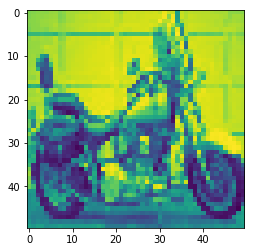

In [34]:
k = y_predicted[150]
if k == 0:
    p = 'car'
elif k== 1:
    p = 'person'
else:
    p = 'motobike'
print('Prediction of image',p)
plt.imshow(xtest[150])
plt.show()

In [35]:
c = r'E:\ML_Codes\car1.jpg'
ic = cv2.imread(c,0)
icr = cv2.resize(ic,(50,50))

In [36]:
icr.shape

(50, 50)

In [40]:
k = np.argmax(model.predict(icr.reshape(1,50,50)))

Prediction of image car


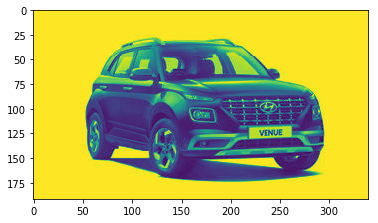

In [42]:
if k == 0:
    p = 'car'
elif k== 1:
    p = 'person'
else:
    p = 'motobike'
print('Prediction of image',p)
plt.imshow(ic)
plt.show()